In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sci kit learn  (sklearn)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
hdf = pd.read_csv("E:/dat1/Housingdata.csv", sep=',')
hdf.head(5)

,size,uds,park,misc,price
0,230.1,37.8,69.2,69.3,22.1
1,44.5,39.3,45.1,58.4,10.4
2,17.2,45.9,69.3,69.2,9.3
3,151.5,41.3,58.5,58.5,18.5
4,180.8,10.8,58.4,45.1,12.9


In [8]:
hdf.shape

(148, 5)

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


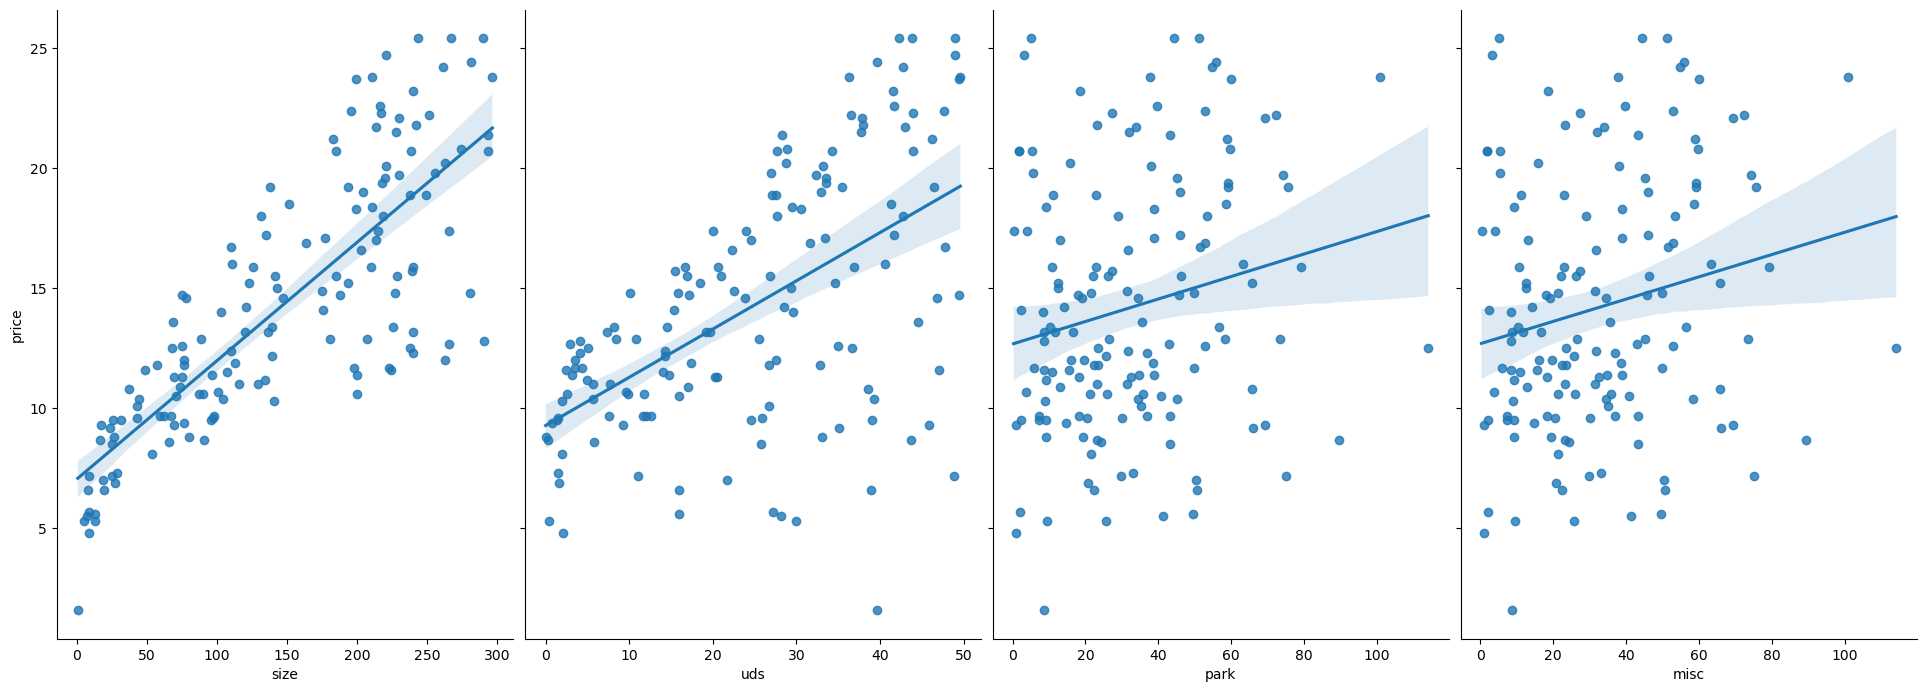

In [10]:
sns.pairplot(hdf, x_vars=['size','uds','park','misc'], y_vars=['price'], kind='reg', size=7, aspect=0.7)

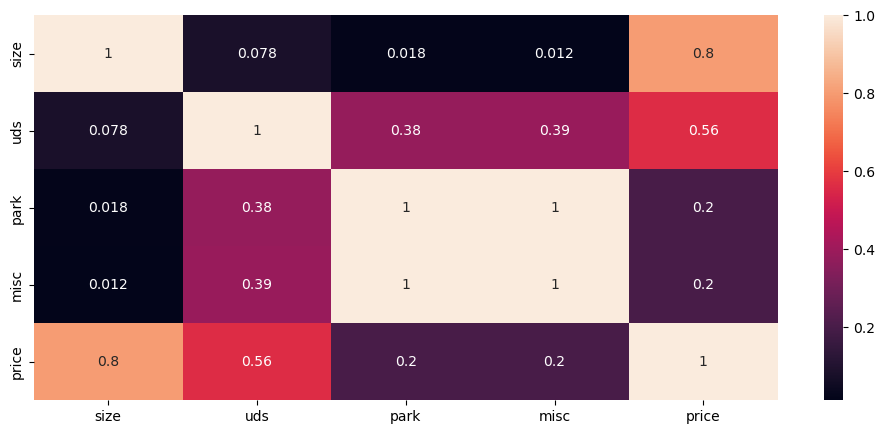

In [12]:
plt.figure(figsize = (12,5))
hcorr = hdf.corr()  # the  correlation is r and it ranges between -1 and +1
sns.heatmap(hdf.corr(), annot=True)
plt.show()

In [18]:
features = ['size','uds','park','misc']
x = hdf[features]
y = hdf['price']
print(x)

      size   uds  park  misc
0    230.1  37.8  69.2  69.3
1     44.5  39.3  45.1  58.4
2     17.2  45.9  69.3  69.2
3    151.5  41.3  58.5  58.5
4    180.8  10.8  58.4  45.1
..     ...   ...   ...   ...
143  104.6   5.7  34.4  34.4
144   96.2  14.8  38.9  38.9
145  140.3   1.9   9.0   9.0
146  240.1   7.3   8.7   8.7
147  243.2  49.0  44.3  44.3

[148 rows x 4 columns]


In [20]:
features = ['size','uds']
x = hdf[features]
y = hdf['price']
print(x)

      size   uds
0    230.1  37.8
1     44.5  39.3
2     17.2  45.9
3    151.5  41.3
4    180.8  10.8
..     ...   ...
143  104.6   5.7
144   96.2  14.8
145  140.3   1.9
146  240.1   7.3
147  243.2  49.0

[148 rows x 2 columns]


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)
print(x_train.shape)
print(x_test.shape)

(111, 2)
(37, 2)


# Training the liner regression model

In [24]:
initfit = LinearRegression()
model = initfit.fit(x_train,y_train)

In [24]:
print(model.coef_)

[ 0.0449675   0.18921076  0.06282151 -0.06706999]


In [25]:
print(model.intercept_)

3.2227298511392277


# Predictinig the test results

In [48]:
pred = model.predict(x_test)
pred

array([12.03345251, 15.03743718, 17.28869829,  9.27864441,  9.03854358,
       21.10449454, 10.54230057,  9.4649789 ,  7.81696673, 22.18245839,
       17.33514719, 20.81913225, 17.6594354 , 15.12924978, 12.71221567,
       20.85690586, 16.42335998, 14.85547123, 23.214312  , 19.66100983,
        8.03460723,  9.31042328, 19.40075114, 19.18761867, 13.04067538,
        8.9532039 , 13.00879534, 21.07789997, 10.11989405, 16.38365449,
        7.00339686,  4.6949125 , 10.3205269 , 11.98778317, 19.2822428 ,
       16.42766248, 10.04763015])

# Evaluating model performance for training and test data set 

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
pred1 = model.predict(x_train)

# root mean squared error -- model test error
rmse = (np.sqrt(metrics.mean_squared_error(y_test,pred)))
rmse

2.03814576105297

In [50]:
# training error
rmse1 = (np.sqrt(metrics.mean_squared_error(y_train,pred1)))
rmse1

1.5861163877810616

# Linear Regression Assumptions

In [ ]:
 1. Linearity
2. Independence - the residuals ( the diff between actual and predicted values ) should be independent of each other
3. Homoscedasticity - variance of the residuals or errors shoud be constant across all levels of the indep variables
4. Normality of Residuals (errors) -  the residuals should be approximately normally distributed
5. No or little multicollinearity - 

In [56]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import scipy.stats as scipystats
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats

In [52]:
lm = smf.ols(formula= "price ~ size + uds ", data = hdf).fit()


In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     620.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           8.41e-72
Time:                        21:57:45   Log-Likelihood:                -288.63
No. Observations:                 148   AIC:                             583.3
Df Residuals:                     145   BIC:                             592.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0074      0.352      8.537      0.0

# 1. Diagose the autocorrelation 

In [77]:
ac = sms.durbin_watson(lm.resid)
# interpretation
if  ac < 1.:
  print('+ve correlation')
elif ac > 2.5:
   print('-ve correlatioon')
else:
  print('No significant autocorrelation')

No significant autocorrelation


# 2. Disgnoze the multicollinearity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]  
vif

[2.35048998186918, 2.35048998186918]

# Homoscadasticity

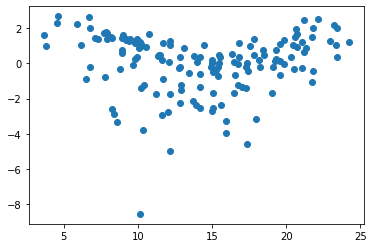

In [72]:
residuals = lm.resid
pred_values = lm.fittedvalues
plt.scatter(pred_values,residuals)

In [62]:
# 3. Kolmogrov smirnov test 
from scipy import stats
stats.kstest(lm.resid, 'norm')
# null hyp : residuals are not normally distributed


KstestResult(statistic=0.18398033567978767, pvalue=7.400536098166692e-05)